In [1]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as tt
import matplotlib.pyplot as plt

In [2]:
#device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#hyperparameters
input_size=784 #28p*28p
hidden_size=100
output=10
epoch=2
lr=1e-4
batch_size=100

In [13]:
#preparing the MNIST dataset
train_dataset=torchvision.datasets.MNIST('./data',transform=tt.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('./data',transform=tt.ToTensor())
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size)

example=iter(train_loader)
sample, label=example.next()

In [7]:
print(sample.shape, label.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


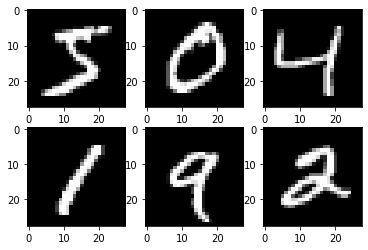

In [8]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(sample[i][0],cmap='gray')
  

In [9]:
#the model
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output):
    super(NeuralNet,self).__init__()
    self.layer1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.layer2=nn.Linear(hidden_size,output)

  def forward(self,sample):
    out=self.layer1(sample)
    out=self.relu(out)
    out=self.layer2(out)
    return out

In [10]:
model=NeuralNet(input_size,hidden_size,output)
#Loss and optimizer
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr)

In [12]:
#training loop
n_steps=len(train_loader)
for i in range(epoch):
  for j, (images,label) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    label=label.to(device)
    #forward
    out=model(images)
    loss=criteria(out,label)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [15]:
#test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for image,label in test_loader:
    image=image.reshape(-1,28*28).to(device)
    label=label.to(device)
    out=model(image)
    val,pred=torch.max(out,1)
    #print(val)
    n_samples+=label.shape[0]
    n_correct+=(pred==label).sum().item()
  acc=n_correct/n_samples *100
  print(f'Accuracy = {acc}%')

Accuracy = 89.615%


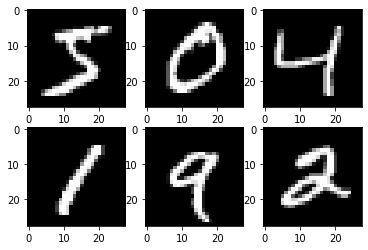

In [16]:
example=iter(test_loader)
sample, label=example.next()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(sample[i][0],cmap='gray')